## 20. JSONデータの読み込み

Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [3]:
!wget -NP ./data http://www.cl.ecei.tohoku.ac.jp/nlp100/data/jawiki-country.json.gz

--2020-07-21 09:16:33--  http://www.cl.ecei.tohoku.ac.jp/nlp100/data/jawiki-country.json.gz
www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp) をDNSに問いあわせています... 130.34.192.83
www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)|130.34.192.83|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 3605822 (3.4M) [application/x-gzip]
`./data/jawiki-country.json.gz' に保存中

jawiki-country.json 100%[===================>]   3.44M  3.13MB/s 時間 1.1s     

2020-07-21 09:16:35 (3.13 MB/s) - `./data/jawiki-country.json.gz' へ保存完了 [3605822/3605822]



In [6]:
!head -c 1000 ./data/jawiki-country.json

{"text": "{{otheruses|主に現代のエジプト・アラブ共和国|古代|古代エジプト}}\n{{基礎情報 国\n|略名 =エジプト\n|日本語国名 =エジプト・アラブ共和国\n|公式国名 ='''{{lang|ar|جمهورية مصر العربية}}'''\n|国旗画像 =Flag of Egypt.svg\n|国章画像 =[[ファイル:Coat_of_arms_of_Egypt.svg|100px|エジプトの国章]]\n|国章リンク =（[[エジプトの国章|国章]]）\n|標語 =なし\n|位置画像 =Egypt (orthographic projection).svg\n|公用語 =[[アラビア語]]\n|首都 =[[カイロ]]\n|最大都市 =カイロ\n|元首等肩書 =[[近代エジプトの国家元首の一覧|大統領]]\n|元首等氏名 =[[アブドルファッターフ・アッ＝シーシー]]\n|首相等肩書 =[[エジプトの首相|首相]]\n|首相等氏名 =[[イブラヒーム・メフレブ]]\n|面積順位 =29\n|面積大きさ =1 E12\n|面積値 =1,001,450\n|水面積率 =0.6%\n|人口統計年 =2011\n|人口順位 =\n|人口大

In [9]:
import json
json_path = './data/jawiki-country.json'

with open('./work/england.txt', 'w') as f_eng:
    for line in open(json_path):
        line = line.strip()

        article_dict = json.loads(line)
        if article_dict['title'] == 'イギリス':
            f_eng.write(article_dict['text'])
            break


## 21. カテゴリ名を含む行を抽出

記事中でカテゴリ名を宣言している行を抽出せよ

In [69]:
import re

for line in open('./work/england.txt'):
    line = line.strip()
    
    if re.search('Category', line):
        print(line)

[[Category:イギリス|*]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国]]
[[Category:海洋国家]]
[[Category:君主国]]
[[Category:島国|くれいとふりてん]]
[[Category:1801年に設立された州・地域]]


## 22. カテゴリ名の抽出

記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [13]:
for line in open('./work/england.txt'):
    line = line.strip()
    
    if line.startswith('[[Category:'):
        line = line.lstrip('[[Category:')
        #|があったら左だけとってくる
        if '|' in line:
            category_name, _ = line.split('|')
        else :
            category_name = line.rstrip(']]')
        print(category_name)

イギリス
英連邦王国
G8加盟国
欧州連合加盟国
海洋国家
君主国
島国
1801年に設立された州・地域


##  23. セクション構造

記事中に含まれるセクション名とそのレベル（例えば"== セクション名 =="なら1）を表示せよ．

In [54]:
import re

##==の数でレベルが決まる
section_pattern = re.compile("(?P<section>={2,6}).*?(?P=section)")

for line in open('./work/england.txt'):
    line = line.strip()
    
    if section_pattern.match(line):
        m = section_pattern.match(line)
        level = int(line.count("=")/2)-1
        section_name = line.strip('=').strip()
        print(section_name, level)

国名 1
歴史 1
地理 1
気候 2
政治 1
外交と軍事 1
地方行政区分 1
主要都市 2
科学技術 1
経済 1
鉱業 2
農業 2
貿易 2
通貨 2
企業 2
交通 1
道路 2
鉄道 2
海運 2
航空 2
通信 1
国民 1
言語 2
宗教 2
婚姻 2
教育 2
文化 1
食文化 2
文学 2
哲学 2
音楽 2
イギリスのポピュラー音楽 3
映画 2
コメディ 2
国花 2
世界遺産 2
祝祭日 2
スポーツ 1
サッカー 2
競馬 2
モータースポーツ 2
脚注 1
関連項目 1
外部リンク 1


## 24. ファイル参照の抽出

記事から参照されているメディアファイルをすべて抜き出せ．

In [60]:
import re

file_pattern = re.compile(r"(?<=File:).*?\.(jpg|jpeg|png|gif|svg|tiff|ogg|oga|ogv|pdf|djvu)", flags = re.IGNORECASE)
media_pattern = re.compile(r"(?<=Media:).*?\.(jpg|jpeg|png|gif|svg|tiff|ogg|oga|ogv|pdf|djvu)", flags = re.IGNORECASE)

for line in open('./work/england.txt'):
    if file_pattern.search(line):
        m = file_pattern.search(line)
        print(m.group())
    elif media_pattern.search(line):
        m = media_pattern.search(line)
        print(m.group())

Battle of Waterloo 1815.PNG
The British Empire.png
Uk topo en.jpg
BenNevis2005.jpg
Elizabeth II greets NASA GSFC employees, May 8, 2007 edit.jpg
Palace of Westminster, London - Feb 2007.jpg
David Cameron and Barack Obama at the G20 Summit in Toronto.jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
Scotland Parliament Holyrood.jpg
London.bankofengland.arp.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow T5.jpg
Anglospeak.svg


## 25. テンプレートの抽出

記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ

In [84]:
from itertools import dropwhile, takewhile,groupby

def arrange_info_text(info_text):
    new_info_text = []
    for k, g in groupby(info_text, lambda line: line.startswith('|')):
        if k:
            new_info_text.extend(list(g))
        else:
            additional_info = ''.join(g)
            new_info_text[-1] += additional_info
    return new_info_text

text = [line.strip() for line in open('./work/england.txt')]

#take while => 条件を満たすまで全部取ってくる
#drop while => 条件を満たしたらそのあと全部とる
flag = False
for item in text:
    if line.startswith('{{基礎情報'):
        flag = True
    
    if flag:
        info_text.append(line)
    
    if line.startswith('}}'):
        break

info_text = arrange_info_text(info_text)

In [86]:
# 辞書化
import pprint 

info_dic = {info.split(' = ')[0].lstrip('|'):info.split(' = ')[1] for info in info_text}

pprint.pprint(info_dic)

{'GDP/人': '36,727<ref name="imf-statistics-gdp" />',
 'GDP値': '2兆3162億<ref name="imf-statistics-gdp" />',
 'GDP値MER': '2兆4337億<ref name="imf-statistics-gdp" />',
 'GDP値元': '1兆5478億<ref '
          'name="imf-statistics-gdp">[http://www.imf.org/external/pubs/ft/weo/2012/02/weodata/weorept.aspx?pr.x=70&pr.y=13&sy=2010&ey=2012&scsm=1&ssd=1&sort=country&ds=.&br=1&c=112&s=NGDP%2CNGDPD%2CPPPGDP%2CPPPPC&grp=0&a= '
          'IMF>Data and Statistics>World Economic Outlook Databases>By '
          'Countrise>United Kingdom]</ref>',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '[[.uk]] / [[.gb]]<ref>使用は.ukに比べ圧倒的少数。</ref>',
 '人口値': '63,181,775<ref>[http://esa.un.org/unpd/wpp/Excel-Data/population.htm '
        'United Nations Department of Economic and Social Affairs>Population '
        'Division>Data>Population>Total Population]</ref>',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像

## 26. 強調マークアップの除去

25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: マークアップ早見表）．

In [87]:
import pprint

emp_pattern = re.compile(r"(?P<emphasis>('{5}|'{2,3}))(?P<main_text>.*?)(?P=emphasis)")

def delete_emp(string):
    def replacement(matchobj):
        return matchobj.group('main_text')
    return emp_pattern.sub(replacement, string)

info_dic = {}
for info in info_text:
    if emp_pattern.search(info):
        info = delete_emp(info)
        
    key = info.split(' = ')[0].strip('|')
    value = info.split(' = ')[1]
    info_dic[key] = value

pprint.pprint(info_dic)

{'GDP/人': '36,727<ref name="imf-statistics-gdp" />',
 'GDP値': '2兆3162億<ref name="imf-statistics-gdp" />',
 'GDP値MER': '2兆4337億<ref name="imf-statistics-gdp" />',
 'GDP値元': '1兆5478億<ref '
          'name="imf-statistics-gdp">[http://www.imf.org/external/pubs/ft/weo/2012/02/weodata/weorept.aspx?pr.x=70&pr.y=13&sy=2010&ey=2012&scsm=1&ssd=1&sort=country&ds=.&br=1&c=112&s=NGDP%2CNGDPD%2CPPPGDP%2CPPPPC&grp=0&a= '
          'IMF>Data and Statistics>World Economic Outlook Databases>By '
          'Countrise>United Kingdom]</ref>',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '[[.uk]] / [[.gb]]<ref>使用は.ukに比べ圧倒的少数。</ref>',
 '人口値': '63,181,775<ref>[http://esa.un.org/unpd/wpp/Excel-Data/population.htm '
        'United Nations Department of Economic and Social Affairs>Population '
        'Division>Data>Population>Total Population]</ref>',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像

## 27. 内部リンクの除去

26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

In [88]:
import pprint

emp_pattern = re.compile(r"(?P<emphasis>('{5}|'{2,3}))(?P<main_text>.*?)(?P=emphasis)")
link_pattern = re.compile(r"\[\[(?P<main_text>.*?)]]")

def delete_emp(string):
    def emp_replace(matchobj):
        return matchobj.group('main_text')
    return emp_pattern.sub(emp_replace, string)

def delete_link(string):
    def link_replace(matchobj):
        main_text = matchobj.group('main_text')
        if not(main_text.startswith('ファイル:')):
            return re.sub('.*?\|', '', main_text)
        else :
            return main_text
    return link_pattern.sub(link_replace, string)

info_dic = {}
for info in info_text:
    if emp_pattern.search(info):
        info = delete_emp(info)
    if link_pattern.search(info):
        info = delete_link(info)
        
    key = info.split(' = ')[0].strip('|')
    value = info.split(' = ')[1]
    info_dic[key] = value

pprint.pprint(info_dic)

{'GDP/人': '36,727<ref name="imf-statistics-gdp" />',
 'GDP値': '2兆3162億<ref name="imf-statistics-gdp" />',
 'GDP値MER': '2兆4337億<ref name="imf-statistics-gdp" />',
 'GDP値元': '1兆5478億<ref '
          'name="imf-statistics-gdp">[http://www.imf.org/external/pubs/ft/weo/2012/02/weodata/weorept.aspx?pr.x=70&pr.y=13&sy=2010&ey=2012&scsm=1&ssd=1&sort=country&ds=.&br=1&c=112&s=NGDP%2CNGDPD%2CPPPGDP%2CPPPPC&grp=0&a= '
          'IMF>Data and Statistics>World Economic Outlook Databases>By '
          'Countrise>United Kingdom]</ref>',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '.uk / .gb<ref>使用は.ukに比べ圧倒的少数。</ref>',
 '人口値': '63,181,775<ref>[http://esa.un.org/unpd/wpp/Excel-Data/population.htm '
        'United Nations Department of Economic and Social Affairs>Population '
        'Division>Data>Population>Total Population]</ref>',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Loca

## 28. MediaWikiマークアップの除去

27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

In [89]:
import re
import pprint

emp_pattern = re.compile(r"(?P<emphasis>('{5}|'{2,3}))(?P<main_text>.*?)(?P=emphasis)")
in_link_pattern = re.compile(r"\[\[(?P<main_text>.*?)]]")
out_link_pattern = re.compile(r"\[.*?]")
html_pattern = re.compile(r"<.*>")
template_pattern = re.compile(r"\{\{(?P<main_text>.*?)}}")

def delete_emp(string):
    def emp_replace(matchobj):
        return matchobj.group('main_text')
    return emp_pattern.sub(emp_replace, string)

def delete_in_link(string):
    def in_link_replace(matchobj):
        main_text = matchobj.group('main_text')
        if not(main_text.startswith('ファイル:')):
            return re.sub('.*?\|', '', main_text)
        else :
            return main_text
    return in_link_pattern.sub(in_link_replace, string)

def delete_out_link(string):
    return out_link_pattern.sub('', string)

def delete_html(string):
    return html_pattern.sub('', string)

def delete_template(string):
    def template_replace(matchobj):
        main_text = matchobj.group('main_text')
        return re.sub('.*?\|', '', main_text)
    return template_pattern.sub(template_replace, string)


delete_func_list = [delete_emp, delete_in_link, delete_out_link, delete_html, delete_template]
delete_pattern_list = [emp_pattern, in_link_pattern, out_link_pattern, html_pattern, template_pattern]

info_dic = {}
for info in info_text:
    
    for delete_pattern, delete_func in zip(delete_pattern_list, delete_func_list):
        if delete_pattern.search(info):
            info = delete_func(info)
        
    key = info.split(' = ')[0].strip('|')
    value = info.split(' = ')[1]
    info_dic[key] = value

pprint.pprint(info_dic)

{'GDP/人': '36,727',
 'GDP値': '2兆3162億',
 'GDP値MER': '2兆4337億',
 'GDP値元': '1兆5478億',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '.uk / .gb',
 '人口値': '63,181,775',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '元首等氏名': 'エリザベス2世',
 '元首等肩書': '女王',
 '公式国名': 'United Kingdom of Great Britain and Northern Ireland',
 '公用語': '英語（事実上）',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国歌': '神よ女王陛下を守り給え',
 '国章リンク': '（国章）',
 '国章画像': 'ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章',
 '国際電話番号': '44',
 '夏時間': '+1',
 '建国形態': '建国',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '時間帯': '±0',
 '最大都市': 'ロンドン',
 '標語': 'Dieu et mon droit（フランス語:神と私の権利）',
 '水面積率': '1.3%',
 '注記': '',
 '略名': 'イギリス',
 '確立年月日1': '927年／843年',
 '確立年月日2': '1707年',
 '確立年月日3': '1801年',
 '確立年月日4': '1927年',
 '確立形態1': 'イングランド王国／スコットランド王国（両国とも1707年連合法まで）',
 '確立形態2': 'グレートブリテン王国建国（1707年連合法

## 29. 国旗画像のURLを取得する

テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: MediaWiki APIのimageinfoを呼び出して，ファイル参照をURLに変換すればよい）

In [90]:
import requests
params = {'format': 'json', 'action': 'query', 'titles':'File:' + info_dic["国旗画像"],
          'prop': 'imageinfo', 'iiprop': 'url'}
r = requests.get('https://commons.wikimedia.org/w/api.php', params)
print(re.search(r'"url":"(.+?)"', r.text).group(1))

https://upload.wikimedia.org/wikipedia/commons/a/ae/Flag_of_the_United_Kingdom.svg


In [91]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/ae/Flag_of_the_United_Kingdom.svg

--2020-07-21 10:45:08--  https://upload.wikimedia.org/wikipedia/commons/a/ae/Flag_of_the_United_Kingdom.svg
upload.wikimedia.org (upload.wikimedia.org) をDNSに問いあわせています... 103.102.166.240
upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 641 [image/svg+xml]
`Flag_of_the_United_Kingdom.svg.2' に保存中

Flag_of_the_United_ 100%[===================>]     641  --.-KB/s 時間 0s       

2020-07-21 10:45:08 (7.55 MB/s) - `Flag_of_the_United_Kingdom.svg.2' へ保存完了 [641/641]



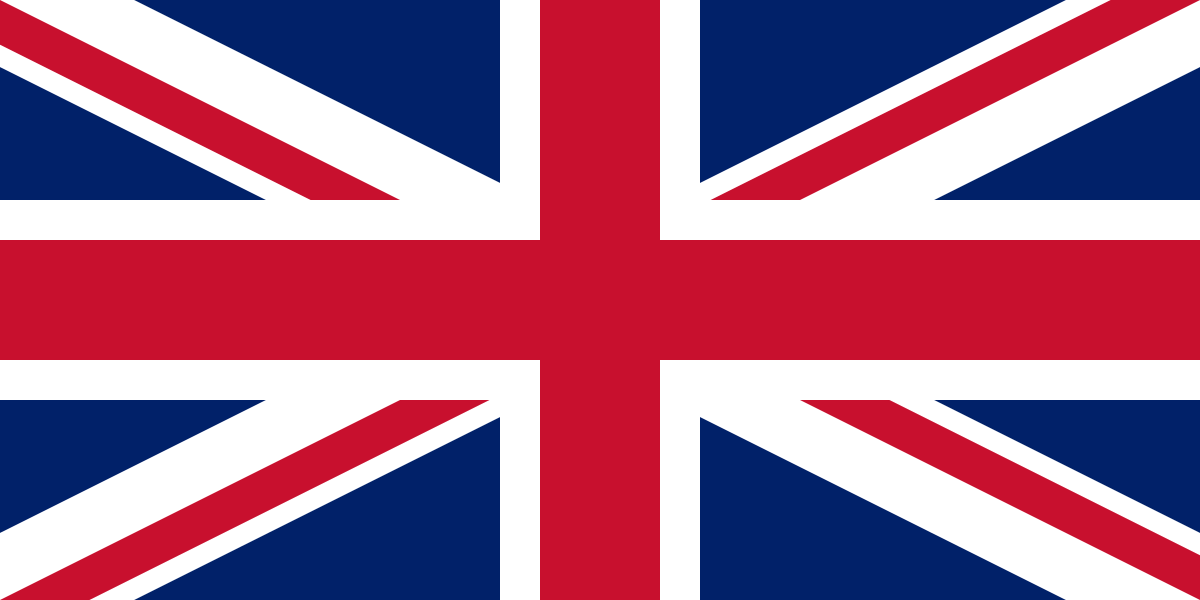

In [92]:
from IPython.display import Image, SVG
SVG('https://upload.wikimedia.org/wikipedia/commons/a/ae/Flag_of_the_United_Kingdom.svg')